In [1]:
# Importing our libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading the dataset from the same folder as the working folder
#EGS means Electrical Grid Stability
EGS_data = pd.read_csv('Data_for_UCI_named.csv')

In [3]:
EGS_data.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [4]:
EGS_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
tau1     10000 non-null float64
tau2     10000 non-null float64
tau3     10000 non-null float64
tau4     10000 non-null float64
p1       10000 non-null float64
p2       10000 non-null float64
p3       10000 non-null float64
p4       10000 non-null float64
g1       10000 non-null float64
g2       10000 non-null float64
g3       10000 non-null float64
g4       10000 non-null float64
stab     10000 non-null float64
stabf    10000 non-null object
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


In [5]:
#Checking for missing value
EGS_data.isnull().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

In [6]:
# Dropping The 'stab' variable
EGS_data.drop('stab', axis = 1, inplace=True)

In [7]:
EGS_data.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,unstable


In [8]:
# Counting the categorical variables
EGS_data['stabf'].value_counts()

unstable    6380
stable      3620
Name: stabf, dtype: int64

### Dropping The Categorical Class Variable

In [9]:
X = EGS_data.drop(columns= 'stabf' ) 
y = EGS_data['stabf']

### Spliting The Dataset into Train/Test Sets

In [10]:
#Importing the training and testing spliting libraries
from sklearn.model_selection import train_test_split

We will split our dataset (Features (X) and Outcome/Label (Y)) into training and test data by using train_test_split() function from sklearn. The training set will be 80% while the test set will be 20%. The random_state that is set to 1 is for all of us to have the same set of data.

In [11]:
#Spliting the dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [12]:
X_train.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
2694,6.255995,2.542401,7.024714,9.476518,3.529888,-1.224881,-0.688228,-1.616780,0.568221,0.618403,0.685739,0.660088
5140,5.070581,5.490253,8.075688,0.761075,4.220888,-1.280596,-1.902185,-1.038107,0.443515,0.097244,0.916955,0.129254
2568,1.220072,8.804028,3.874283,8.433949,3.614027,-1.039236,-0.953566,-1.621224,0.908353,0.923594,0.238881,0.660156
3671,7.498402,6.697603,8.798626,2.126236,3.134585,-1.581906,-0.589386,-0.963293,0.260826,0.899003,0.964752,0.600598
7427,7.074006,1.337511,6.100756,7.759156,2.526922,-0.922540,-0.632600,-0.971782,0.984580,0.716082,0.836928,0.165162


In [13]:
y_train.value_counts()

unstable    5092
stable      2908
Name: stabf, dtype: int64

In [14]:
X_train.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
2694,6.255995,2.542401,7.024714,9.476518,3.529888,-1.224881,-0.688228,-1.616780,0.568221,0.618403,0.685739,0.660088
5140,5.070581,5.490253,8.075688,0.761075,4.220888,-1.280596,-1.902185,-1.038107,0.443515,0.097244,0.916955,0.129254
2568,1.220072,8.804028,3.874283,8.433949,3.614027,-1.039236,-0.953566,-1.621224,0.908353,0.923594,0.238881,0.660156
3671,7.498402,6.697603,8.798626,2.126236,3.134585,-1.581906,-0.589386,-0.963293,0.260826,0.899003,0.964752,0.600598
7427,7.074006,1.337511,6.100756,7.759156,2.526922,-0.922540,-0.632600,-0.971782,0.984580,0.716082,0.836928,0.165162


### Trying to solve the imbalance in the Data set

In [15]:
import imblearn 
from imblearn.over_sampling import SMOTE 
smote = SMOTE(random_state= 1 ) 
X_train_balanced, y_train_balanced = smote.fit_sample(X_train, y_train) 

In [16]:
X_train_balanced.shape

(10184, 12)

In [17]:
y_train_balanced.shape

(10184,)

In [18]:
X_test.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
9953,6.877876,4.113820,9.356768,8.299753,4.056779,-1.897470,-1.590581,-0.568728,0.276567,0.845536,0.112440,0.822562
3850,5.802841,6.271371,4.731540,3.819867,3.579569,-1.709480,-1.067511,-0.802579,0.077527,0.416478,0.912846,0.861306
4962,2.286998,4.385142,2.830232,5.293880,3.035814,-1.202764,-0.902011,-0.931039,0.924216,0.130186,0.703887,0.063811
3886,5.019920,2.209962,6.266080,0.578901,4.322584,-1.960207,-1.074561,-1.287815,0.546910,0.065992,0.427349,0.814648
5437,7.646145,9.187896,5.484219,9.934313,3.634226,-1.254541,-1.335366,-1.044319,0.561528,0.121611,0.787318,0.300314


### Standard Scaling the Dataset

In [19]:
from sklearn.preprocessing import MinMaxScaler # For normalizing our dataset to common scale
scaler = MinMaxScaler()
normalised_train_df = scaler.fit_transform(X_train_balanced) 
normalised_train_df = pd.DataFrame(normalised_train_df, columns=X_train.columns) 


In [20]:
X_test = X_test.reset_index(drop= True ) 
normalised_test_df = scaler.transform(X_test) 
normalised_test_df = pd.DataFrame(normalised_test_df, columns= X_test.columns) 
normalised_test_df.head() 

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
0,0.671365,0.380367,0.932340,0.821112,0.577835,0.068198,0.272932,0.954195,0.238500,0.837447,0.065691,0.813278
1,0.558188,0.607557,0.445405,0.349467,0.466385,0.193555,0.621676,0.798284,0.028968,0.385755,0.908498,0.854065
2,0.188048,0.408938,0.245239,0.504652,0.339393,0.531448,0.732018,0.712638,0.920287,0.084360,0.688470,0.014509
3,0.475764,0.179892,0.606958,0.008257,0.639912,0.026362,0.616975,0.474772,0.523093,0.016780,0.397283,0.804946
4,0.752247,0.914666,0.524646,0.993199,0.479150,0.496922,0.443090,0.637113,0.538482,0.075332,0.776320,0.263485


### Decision Tree Classifier Model

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
dtree = DecisionTreeClassifier(random_state=1)
dtree.fit(normalised_train_df, y_train_balanced)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

### Prediction And Model Evaluation

In [23]:
ydt_pred = dtree.predict(normalised_test_df)

In [24]:
from sklearn.metrics import classification_report, confusion_matrix, recall_score, accuracy_score, precision_score, f1_score

In [25]:
print('Confusion Matrix: \n{}'.format(confusion_matrix(y_test, ydt_pred)))
print('\n')
print('Classification Report: \n{}'.format(classification_report(y_test, ydt_pred)))

Confusion Matrix: 
[[ 579  133]
 [ 160 1128]]


Classification Report: 
             precision    recall  f1-score   support

     stable       0.78      0.81      0.80       712
   unstable       0.89      0.88      0.89      1288

avg / total       0.85      0.85      0.85      2000



### Accuracy

In [26]:
accuracy = accuracy_score(y_test, ydt_pred) 
print( 'Accuracy: {}' .format(round(accuracy* 100 ), 2 ))

Accuracy: 85.0


### Precision

In [27]:
precision = precision_score(y_test, ydt_pred, pos_label= 'unstable') 
print( 'Precision: {}' .format(round(precision* 100 ), 2 ))

Precision: 89.0


### Recall

In [28]:
recall = recall_score(y_test, ydt_pred,pos_label= 'unstable') 
print( 'Recall: {}' .format(round(recall* 100 ), 2 ))

Recall: 88.0


### F1-Score

In [29]:
f1 = f1_score(y_test, ydt_pred, pos_label= 'unstable') 
print( 'F1_score: {}' .format(round(f1* 100 ), 2 ))

F1_score: 89.0


## Building Random Forest Model

In [30]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [31]:
rfc =RandomForestClassifier(random_state=1)

In [32]:
rfc.fit(normalised_train_df,y_train_balanced)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

### Prediction And Model Evaluation

In [33]:
rfc_pred =rfc.predict(normalised_test_df)

In [34]:
print('Confusion Matrix: \n{}'.format(confusion_matrix(y_test, rfc_pred)))
print('\n')
print('Classification Report: \n{}'.format(classification_report(y_test, rfc_pred)))

Confusion Matrix: 
[[ 646   66]
 [ 174 1114]]


Classification Report: 
             precision    recall  f1-score   support

     stable       0.79      0.91      0.84       712
   unstable       0.94      0.86      0.90      1288

avg / total       0.89      0.88      0.88      2000



### Accuracy RFC

In [37]:
accuracy = accuracy_score(y_test, rfc_pred) 
print( 'Accuracy: {}' .format(round(accuracy* 100 ), 4 ))
accuracy

Accuracy: 88.0


0.88

### Precision RFC

In [36]:
precision = precision_score(y_test, rfc_pred,pos_label= 'unstable') 
print( 'Precision: {}' .format(round(precision* 100 ), 2 ))

Precision: 94.0


### Recall RFC

In [38]:
recall = recall_score(y_test, rfc_pred,pos_label= 'unstable') 
print( 'Recall: {}' .format(round(recall* 100 ), 2 ))

Recall: 86.0


### F1_Score RFC

In [39]:
f1 = f1_score(y_test, rfc_pred,pos_label= 'unstable') 
print( 'F1_score: {}' .format(round(f1* 100 ), 2 ))

F1_score: 90.0


## Building Extra Trees Classifier

In [40]:
etc = ExtraTreesClassifier(random_state=1)

In [41]:
etc.fit(normalised_train_df,y_train_balanced)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

### Prediction And Evaluation

In [42]:
etc_pred =etc.predict(normalised_test_df)

In [43]:
#Printing the confusion matrix and classification report
print('Confusion Matrix: \n{}'.format(confusion_matrix(y_test, etc_pred)))
print('\n')
print('Classification Report: \n{}'.format(classification_report(y_test, etc_pred)))

Confusion Matrix: 
[[ 622   90]
 [ 182 1106]]


Classification Report: 
             precision    recall  f1-score   support

     stable       0.77      0.87      0.82       712
   unstable       0.92      0.86      0.89      1288

avg / total       0.87      0.86      0.87      2000



### Accuracy ETC

In [44]:
accuracy = accuracy_score(y_test, etc_pred) 
print( 'Accuracy: {}' .format(round(accuracy* 100 ), 2 ))
accuracy

Accuracy: 86.0


0.864

### Precision ETC

In [45]:
precision = precision_score(y_test, etc_pred,pos_label= 'unstable') 
print( 'Precision: {}' .format(round(precision* 100 ), 2 ))

Precision: 92.0


### Recall ETC

In [46]:
recall = recall_score(y_test, etc_pred,pos_label= 'unstable') 
print( 'Recall: {}' .format(round(recall* 100 ), 2 ))

Recall: 86.0


### F1-Score

In [47]:
f1 = f1_score(y_test, etc_pred,pos_label= 'unstable') 
print( 'F1_score: {}' .format(round(f1* 100 ), 2 ))

F1_score: 89.0


### Building XGBoost Model

In [48]:
import xgboost as xgb #XGBoost stufff

In [49]:
XGB = xgb.XGBClassifier(random_state =1)

In [50]:
XGB.fit(normalised_train_df,y_train_balanced)

C:\Users\user\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:43:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.300000012, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=100, n_jobs=2, num_parallel_tree=1,
       objective='binary:logistic', random_state=1, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
       use_label_encoder=True, validate_parameters=1, verbosity=None)

### Prediction & Evaluation

In [51]:
XGB_pred = XGB.predict(normalised_test_df)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [52]:
#Printing the confusion matrix and classification report
print('Confusion Matrix: \n{}'.format(confusion_matrix(y_test, XGB_pred)))
print('\n')
print('Classification Report: \n{}'.format(classification_report(y_test, XGB_pred)))

Confusion Matrix: 
[[ 667   45]
 [  72 1216]]


Classification Report: 
             precision    recall  f1-score   support

     stable       0.90      0.94      0.92       712
   unstable       0.96      0.94      0.95      1288

avg / total       0.94      0.94      0.94      2000



### Accuracy XGB

In [53]:
accuracy = accuracy_score(y_test, XGB_pred) 
print( 'Accuracy: {}' .format(round(accuracy* 100 ), 2 ))
accuracy

Accuracy: 94.0


0.9415

### Pecision XGB

In [54]:
precision = precision_score(y_test, XGB_pred, pos_label= 'unstable') 
print( 'Precision: {}' .format(round(precision* 100 ), 2 ))

Precision: 96.0


### Recall XGB

In [55]:
recall = recall_score(y_test, XGB_pred, pos_label= 'unstable') 
print( 'Recall: {}' .format(round(recall* 100 ), 2 ))

Recall: 94.0


### F1-Score XGB

In [56]:
f1 = f1_score(y_test, XGB_pred, pos_label= 'unstable') 
print( 'F1_score: {}' .format(round(f1* 100 ), 2 ))

F1_score: 95.0


## Building LightGBM Model

In [57]:
import lightgbm as lgb

In [58]:
LGB = lgb.LGBMClassifier(random_state=1)

In [59]:
LGB.fit(normalised_train_df,y_train_balanced)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
        random_state=1, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

### Prediction And Evaluation on LGBM Model

In [60]:
LGB_pred = LGB.predict(normalised_test_df)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [61]:
#Printing the confusion matrix and classification report
print('Confusion Matrix: \n{}'.format(confusion_matrix(y_test, LGB_pred)))
print('\n')
print('Classification Report: \n{}'.format(classification_report(y_test, LGB_pred)))

Confusion Matrix: 
[[ 660   52]
 [  88 1200]]


Classification Report: 
             precision    recall  f1-score   support

     stable       0.88      0.93      0.90       712
   unstable       0.96      0.93      0.94      1288

avg / total       0.93      0.93      0.93      2000



### Accuracy LGBM

In [62]:
accuracy = accuracy_score(y_test, LGB_pred) 
print( 'Accuracy: {}' .format(round(accuracy* 100 ), 2 ))
accuracy

Accuracy: 93.0


0.93

### Precision LGBM

In [63]:
precision = precision_score(y_test, LGB_pred, pos_label= 'unstable') 
print( 'Precision: {}' .format(round(precision* 100 ), 2 ))

Precision: 96.0


### Recall LGBM

In [64]:
recall = recall_score(y_test, LGB_pred, pos_label= 'unstable') 
print( 'Recall: {}' .format(round(recall* 100 ), 2 ))

Recall: 93.0


### F1-Score LGBM

In [65]:
f1 = f1_score(y_test, LGB_pred, pos_label= 'unstable') 
print( 'F1_score: {}' .format(round(f1* 100 ), 2 ))

F1_score: 94.0


## Building Randomized SearchCV Model on the ExtraTreeClassifier

In [66]:
from sklearn.model_selection import RandomizedSearchCV

In [67]:
# Initiating parameters for hyperparameter_grid
n_estimators = [50, 100, 300, 500, 1000]

min_samples_split = [2, 3, 5, 7, 9]

min_samples_leaf = [1, 2, 4, 6, 8]

max_features = ['auto', 'sqrt', 'log2', None]

In [68]:
hyperparameter_grid = {'n_estimators': n_estimators,

'min_samples_leaf': min_samples_leaf,

'min_samples_split': min_samples_split,

'max_features': max_features}

In [69]:
rcv = RandomizedSearchCV(etc, hyperparameter_grid, n_iter=10, cv=5, scoring = 'accuracy', n_jobs = -1, verbose = 1, random_state = 1)

In [70]:
RCV = rcv.fit(normalised_train_df, y_train_balanced)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  3.5min finished


In [71]:
#Getting the best estimator
from pprint import pprint
pprint(RCV.best_estimator_.get_params())

{'bootstrap': False,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 2,
 'min_samples_split': 9,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 300,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}


In [72]:
#Getting the Best Score and Hyperparameters
print('Best Score: %s' % RCV.best_score_)
print('Best Hyperparameters: %s' % RCV.best_params_)

Best Score: 0.9494304791830322
Best Hyperparameters: {'n_estimators': 300, 'min_samples_split': 9, 'min_samples_leaf': 2, 'max_features': 'auto'}


### Prediction And Evaluation-RSCV

In [73]:
RCV_pred = rcv.predict(normalised_test_df)

In [74]:
#Printing the confusion matrix and classification report
print('Confusion Matrix: \n{}'.format(confusion_matrix(y_test, RCV_pred)))
print('\n')
print('Classification Report: \n{}'.format(classification_report(y_test, RCV_pred)))

Confusion Matrix: 
[[ 648   64]
 [  95 1193]]


Classification Report: 
             precision    recall  f1-score   support

     stable       0.87      0.91      0.89       712
   unstable       0.95      0.93      0.94      1288

avg / total       0.92      0.92      0.92      2000



### Accuracy-RSCV

In [75]:
accuracy = accuracy_score(y_test, RCV_pred) 
print( 'Accuracy: {}' .format(round(accuracy* 100 ), 2 ))

Accuracy: 92.0


### Precision-RSCV

In [76]:
precision = precision_score(y_test, RCV_pred, pos_label= 'unstable') 
print( 'Precision: {}' .format(round(precision* 100 ), 2 ))

Precision: 95.0


### Recall-RSCV

In [77]:
recall = recall_score(y_test, RCV_pred, pos_label= 'unstable') 
print( 'Recall: {}' .format(round(recall* 100 ), 2 ))

Recall: 93.0


### F1-Score RSCV

In [78]:
f1 = f1_score(y_test, RCV_pred, pos_label= 'unstable') 
print( 'F1_score: {}' .format(round(f1* 100 ), 2 ))

F1_score: 94.0


### New optimal ExtraTreeClassifier Model Using RandomSearchCV Hyperparameters

In [79]:
netc = ExtraTreesClassifier(n_estimators=300, min_samples_split=9, min_samples_leaf=2, max_features='auto',random_state=1)

In [80]:
netc.fit(normalised_train_df, y_train_balanced)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=9,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [81]:
netc_pred = netc.predict(normalised_test_df)

In [82]:
accuracy = accuracy_score(y_test, netc_pred) 
print( 'Accuracy: {}' .format(round(accuracy* 100 ), 2 ))
accuracy

Accuracy: 92.0


0.9205

### Checking the most important features using the new optimal ExtraTreeClassifier Model

In [83]:
#Checking the most important features using the optimal ExtraTreeClassifier Model
feature_importance = netc.feature_importances_

In [84]:
feature_importance_normalized = np.std([tree.feature_importances_ for tree in 
                                        netc.estimators_],
                                        axis = 0)

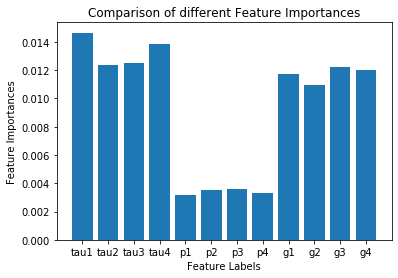

In [85]:
plt.bar(X.columns, feature_importance_normalized)
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.title('Comparison of different Feature Importances')
plt.show()